In [17]:
import pandas as pd

data_path = '../../data_prep/output/data_corpus.csv'

In [18]:
df = pd.read_csv(data_path, usecols=['id', 'pub_date', 'origin', 'ipc'])

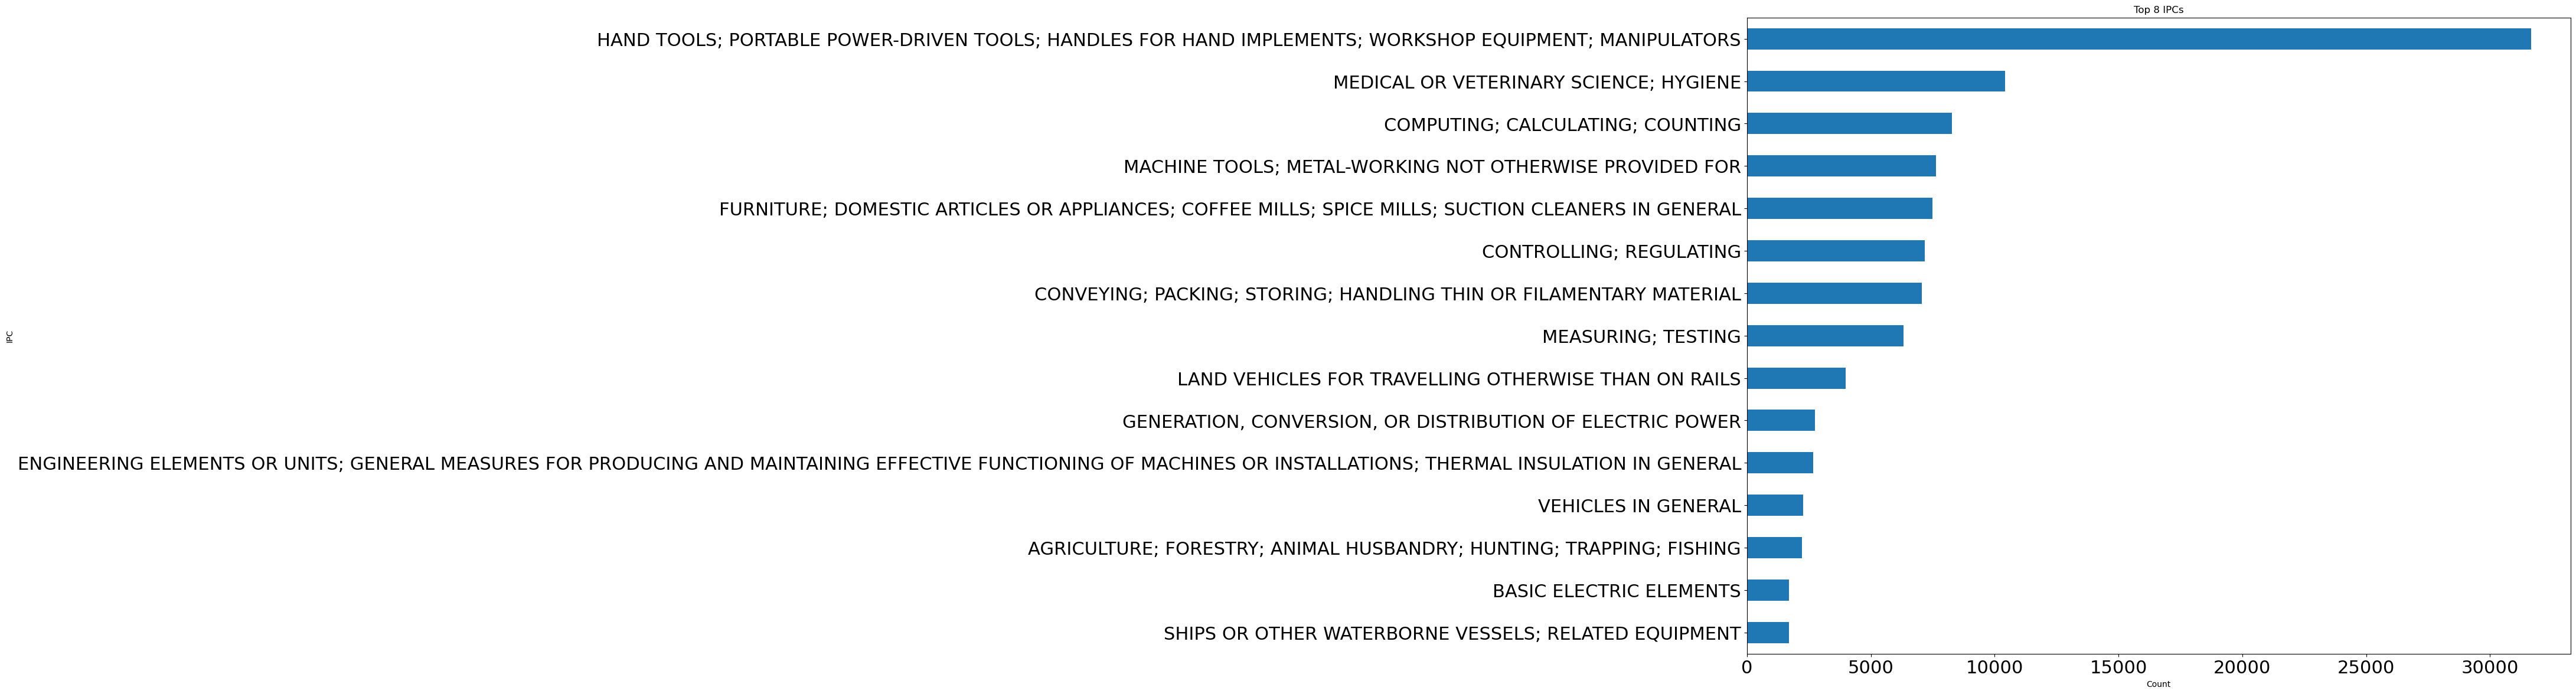

In [19]:
import matplotlib.pyplot as plt

topipcs = df.ipc.value_counts()[:15][::-1]

# Plotting a horizontal bar chart
plt.figure(figsize=(18, 14))
topipcs.plot(kind='barh', title='Top 8 IPCs')
plt.xlabel('Count')
plt.ylabel('IPC')
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)
plt.show()

In [20]:
# Convert pub_date to quarterly periods
df['pub_date'] = pd.to_datetime(df['pub_date']).dt.to_period('Q')

# Filter out the second quarter of 2024
df = df[~(df['pub_date'] == '2024Q2')]

# Convert to year and month periods
df['pub_date'] = df['pub_date'].dt.to_timestamp().dt.to_period('M').dt.to_timestamp()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122827 entries, 762 to 123666
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        122827 non-null  object        
 1   pub_date  122827 non-null  datetime64[ns]
 2   origin    122827 non-null  object        
 3   ipc       122827 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 4.7+ MB


In [22]:
import seaborn as sns
# Define a color palette for IPC codes
ipc_palette = sns.color_palette("tab10", n_colors=10)
ipc_colors = {}
ipcs = set()

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import LogLocator, MultipleLocator, FuncFormatter

def plot_line_byorig(df, origin):
    plt.figure(figsize=(12, 5))
    # Sort the legend by total count
    sorted_ipc = df.ipc.value_counts().index
    grouped_df = df.groupby(['pub_date', 'ipc']).size().reset_index(name='count')
    sns.lineplot(data=grouped_df, x='pub_date', y='count', hue='ipc',
                 hue_order=sorted_ipc, palette=ipc_colors, markers=True, dashes=False, linewidth=2.5)

    # Customize the plot
    plt.title(f'Number of Patents by IPC Code and Publication Year for {origin}')
    plt.xlabel('Publication Year')
    plt.ylabel('Number of Patents')
    plt.yscale('log')
    #plt.gca().yaxis.set_major_locator(LogLocator(base=2.0))
    # Adjust the legend
    # Format x-axis labels
    # Format x-axis labels
    # Format x-axis labels
    def format_quarters(x, pos=None):
        x = mdates.num2date(x)
        quarter = (x.month - 1) // 3 + 1
        return f'{x.year}-Q{quarter}'

    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1, 4, 7, 10]))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_quarters))
    plt.legend(title='IPC Code', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True, which='both', linestyle='--')

    plt.show()

In [24]:
def get_df_byorigin(df, origin):    
    df_res = df[df['origin'] == origin]

    top_eu_ipcs = df_res['ipc'].value_counts().head(8).index.tolist()
    return df_res[df_res['ipc'].isin(top_eu_ipcs)]

In [25]:
origins = df['origin'].unique()
for origin in origins:
    df_res = get_df_byorigin(df, origin)
    ipcs = ipcs | set(df_res['ipc'].unique())
for i, ipc in enumerate(ipcs):
    ipc_colors[ipc] = ipc_palette[i % len(ipc_palette)]

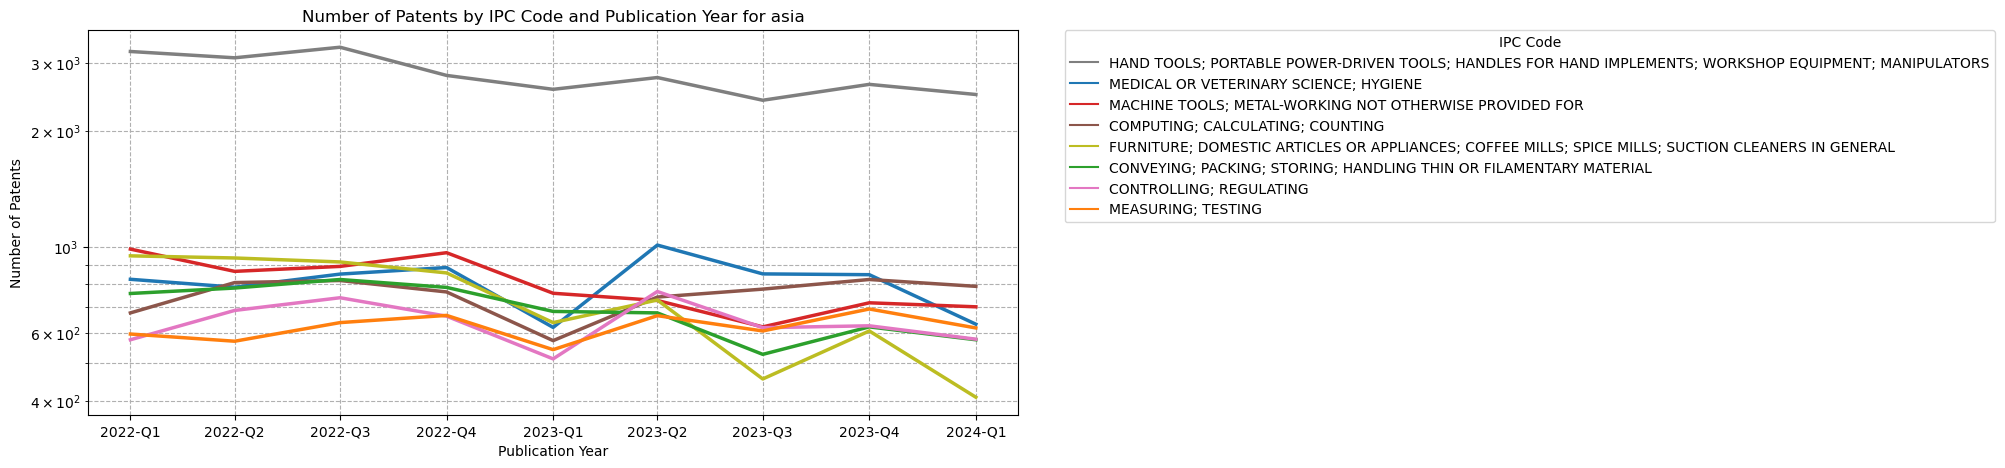

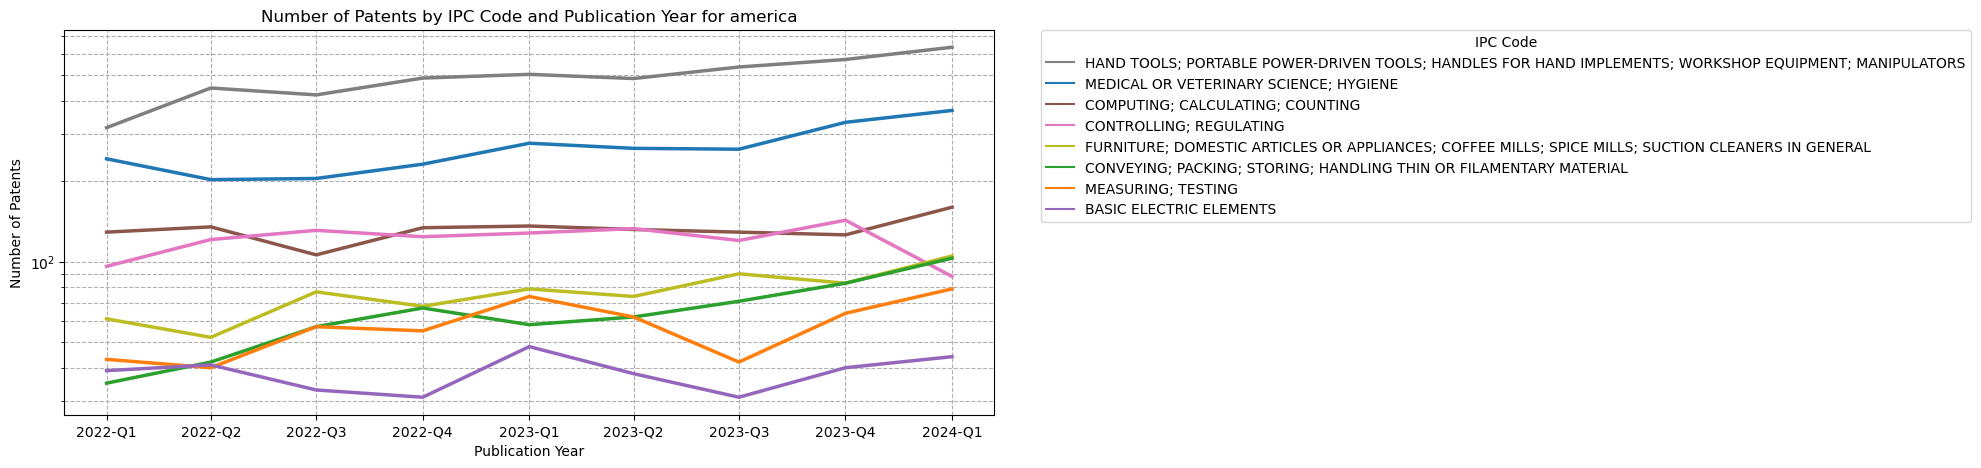

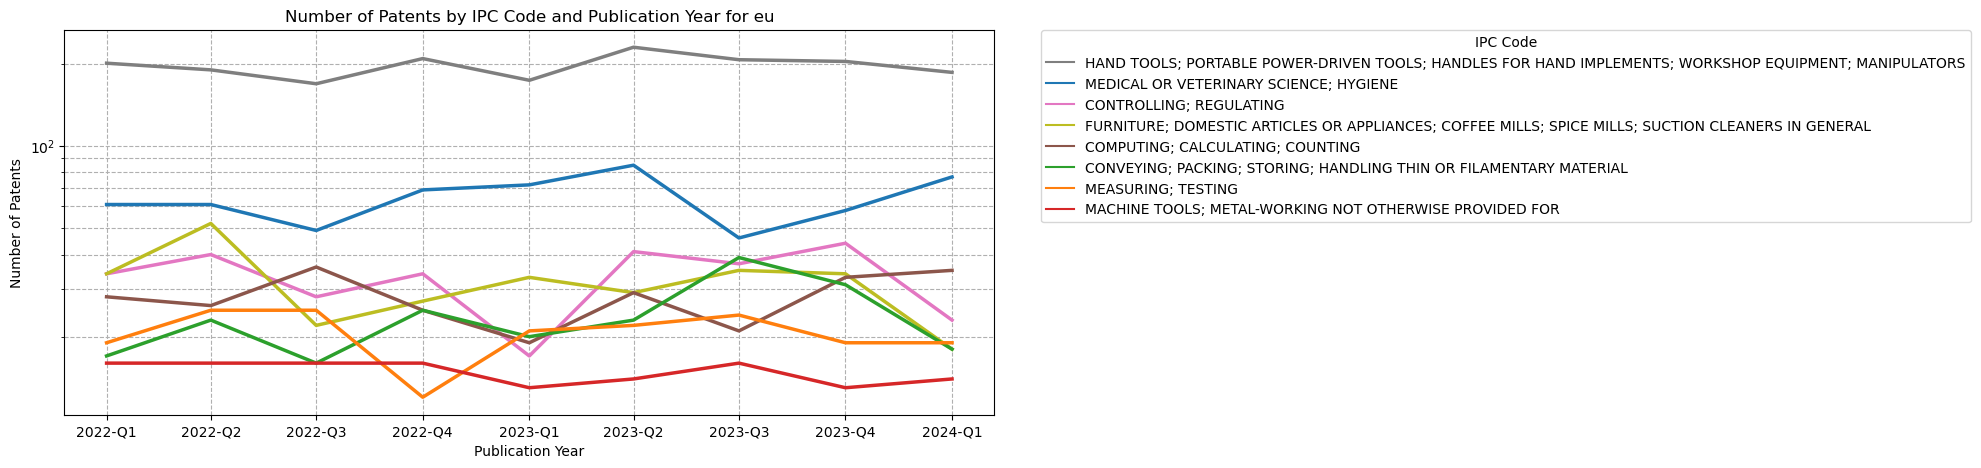

In [26]:
origins = df['origin'].unique()
for origin in origins:
    df_res = get_df_byorigin(df, origin)
    ipcs = ipcs | set(df_res['ipc'].unique())
    for i, ipc in enumerate(ipcs):
        ipc_colors[ipc] = ipc_palette[i % len(ipc_palette)]
    plot_line_byorig(df_res, origin)